<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_Julho_2020_using/blob/master/Segmentacao_e_leitura_FotoS_v_03_julho_15_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_Julho_2020
%cd marquesgabi_Julho_2020
Transfere='Maria_Gabriela_Segmenta_FotosGrandes.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'marquesgabi_Julho_2020' already exists and is not an empty directory.
/content/marquesgabi_Julho_2020


In [ ]:
# First step: get the segmented file (photos stored in csv file)

# First step: get the segmented file (photos stored in csv file)

In [ ]:
labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

In [ ]:
df=pd.read_csv(labels[0])
y_PC=df['Type']

In [ ]:
#print(df.drop(['Unnamed: 0','Type','Width'], axis=1))

In [ ]:
Fotos=df.drop(['Unnamed: 0','Type','Width'], axis=1)

In [ ]:
#print(Fotos)

In [ ]:
print(np.array(Fotos).shape )

(36, 784)


In [ ]:
28*28

784

# Second step: create the ann to evaluate which is a grain in photos segmented


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_Julho_2020/Doutorado


In [ ]:
#Construção da rede com as fotos já recortadas anteriormente
labels = [] #882 imagens recortadas por nós
images = [] #882 imagens lidas no formato de lista 
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)

In [ ]:
# Import the 'transform' module from 'skimage'
from skimage import transform 

# Rescale the images in the 'images' array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [ ]:
print(images28[0].shape)

(28, 28, 3)


In [ ]:
# Import 'rgb2gray' from 'skimage.color'
from skimage.color import rgb2gray

# Convert 'images28' to an array
images28 = np.array(images28)

# Convert 'images28' to grayscale
images28 = rgb2gray(images28)

In [ ]:
y_valor=[]

img_name=labels

Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in img_name:
  if re.search(Graos, x):
    y_valor.append(1)
  elif re.search(Indef, x):
    y_valor.append(2)
  elif re.search(Buraco, x):
    y_valor.append(3)
  else:
    y_valor.append(4)
    
print(y_valor)
print(len(y_valor))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 

In [ ]:
#Define data train and data test
W_train, W_test, yw_train, yw_test = train_test_split(np.array(images28), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
train_images=W_train #imagens utilizadas para o treino
train_labels=yw_train # resposta da rede
test_images=W_test
test_labels=yw_test

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 1.4076 - accuracy: 0.4165
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 1.0108 - accuracy: 0.5883
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.9009 - accuracy: 0.6272
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8267 - accuracy: 0.6613
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7558 - accuracy: 0.6969
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7173 - accuracy: 0.6953
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.7083
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.7423
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.7472
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.7731


In [ ]:
#ANN das imagens recortadas por nós
x=images28 
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
#print(prediction)

In [ ]:
data = {'y_Actual': y_valor,
        'y_Predicted': prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#print (df)

In [ ]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    1   2    3   4
Actual                     
1          340   4    6  10
2           31  83   32  34
3            1   0  176   3
4           55  32    5  70


In [ ]:
#print(x[0].flatten())

# Third step: convert file in x to use in tf

In [ ]:
# x images crop by computer 
x=[]
Row,Col=Fotos.shape
for i in range(Row):
  XW=[]
  XW.append(Fotos.iloc[i])
  x.append(np.array(XW).reshape(28,28))
#print(x)
'''
Foto=np.array(img28_all.iloc[27]).reshape(28,28)
plt.imshow(Foto, cmap = "gray")
'''

'\nFoto=np.array(img28_all.iloc[27]).reshape(28,28)\nplt.imshow(Foto, cmap = "gray")\n'

# Fourth step: use tf in segmented photos obtained automatically

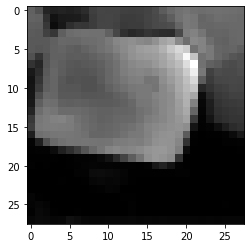

In [ ]:
# testing if is working the convertion to 28x28
Fotos=pd.DataFrame(Fotos)
Foto_test=np.array(Fotos.iloc[2]).reshape(28,28)
plt.imshow(Foto_test, cmap = "gray")

In [ ]:
# to get the number of columns and rows 
row,col=Fotos.shape
print(row)
print(col)

36
784


In [ ]:
# using the convertion for all pictures
images28_PC=[]
for k in range(row):
  images28_PC.append(np.array(Fotos.iloc[k]).reshape(28,28))

In [ ]:
x_PC=np.array(images28_PC)
logits = model(x_PC, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction)
''''''

tf.Tensor([3 1 1 3 4 4 3 3 4 2 4 2 1 1 2 3 3 4 4 4 3 2 4 4 3 2 2 1 4 3 3 4 4 3 4 4], shape=(36,), dtype=int32)


''

In [ ]:
label=np.array(prediction) # converting tensor flow output to array output
print(label)


[3 1 1 3 4 4 3 3 4 2 4 2 1 1 2 3 3 4 4 4 3 2 4 4 3 2 2 1 4 3 3 4 4 3 4 4]


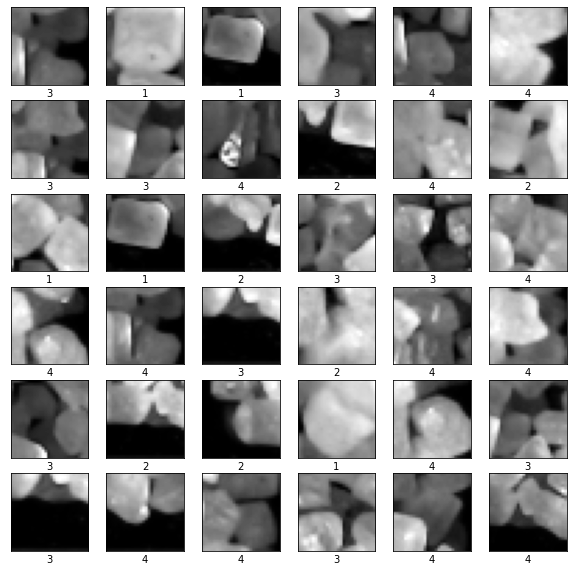

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.figure(figsize=(10,10))
for i in range(row):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    VIEW=np.array(Fotos.iloc[i]).reshape(28,28)
    plt.imshow(VIEW, cmap = "gray")
    plt.xlabel(label[i])
plt.show()
plt.subplots_adjust(bottom=0.2, right=6, top=6,hspace=0.4, wspace=0.5)

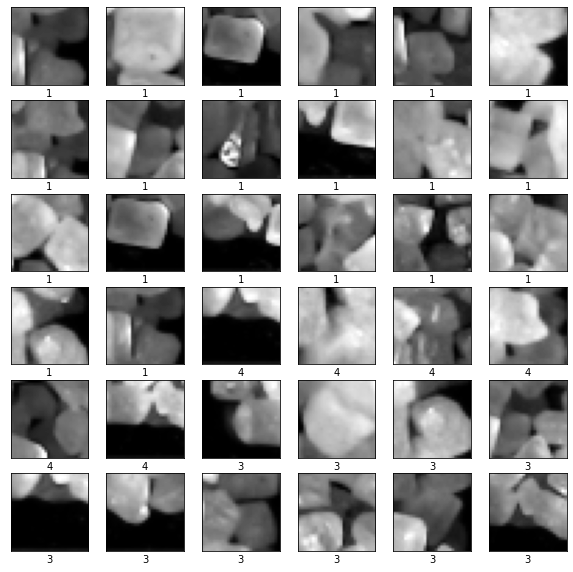

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.figure(figsize=(10,10))
for i in range(row):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    VIEW=np.array(Fotos.iloc[i]).reshape(28,28)
    plt.imshow(VIEW, cmap = "gray")
    plt.xlabel(y_valor[i])
plt.show()
plt.subplots_adjust(bottom=0.2, right=6, top=6,hspace=0.4, wspace=0.5)

In [ ]:
# just to remeber
'''
Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4
'''

"\nGraos='G' # numero 1\nIndef='I' # numero 2\nBuraco='B' # numero 3\nVarios='V' # numero 4\n"

In [ ]:

y_valor=[]


Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in y_PC:
  if re.search('G', x):
    y_valor.append(1)
  elif re.search('I', x):
    y_valor.append(2)
  elif re.search('B', x):
    y_valor.append(3)
  else:
    y_valor.append(4)


In [ ]:
data = {'y_Predicted': prediction,
        'y_Actual': y_valor
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (df)

    y_Actual  y_Predicted
0          2            3
1          2            1
2          1            1
3          2            3
4          2            4
5          2            4
6          2            3
7          2            3
8          2            4
9          3            2
10         2            4
11         2            2
12         2            1
13         1            1
14         3            2
15         2            3
16         2            3
17         2            4
18         2            4
19         2            4
20         3            3
21         2            2
22         2            4
23         2            4
24         2            3
25         3            2
26         3            2
27         2            1
28         1            4
29         2            3
30         3            3
31         3            4
32         2            4
33         2            3
34         2            4
35         3            4


In [ ]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  1  2  3   4
Actual                
1          2  0  0   1
2          3  2  9  11
3          0  4  2   2


In [ ]:
'''
print(images28_B[0])
'''

'\nprint(images28_B[0])\n'